### Libraries

In [20]:
import os
import random
from glob import glob

import matplotlib.pyplot as plt
import numpy as np
import seedir
from scipy import ndimage
from skimage import io

### Load data

In [8]:
external_disk_path = "/media/tiagociiic/easystore"
dataset_dir = os.path.join(external_disk_path, "RORD")
train_dir = os.path.join(dataset_dir, "train")

In [9]:
seedir.seedir(train_dir, itemlimit=3, style='lines', indent=4)

train/
├───gt/
│   ├───I-210614_O04019_W01/
│   │   ├───I-210614_O04019_W01_F0001.jpg
│   │   ├───I-210614_O04019_W01_F0002.jpg
│   │   └───I-210614_O04019_W01_F0003.jpg
│   ├───I-210614_O04019_W03/
│   │   ├───I-210614_O04019_W03_F0001.jpg
│   │   ├───I-210614_O04019_W03_F0002.jpg
│   │   └───I-210614_O04019_W03_F0003.jpg
│   └───I-210614_O04019_W04/
│       ├───I-210614_O04019_W04_F0001.jpg
│       ├───I-210614_O04019_W04_F0002.jpg
│       └───I-210614_O04019_W04_F0003.jpg
└───img/
    ├───I-211016_I09027_T05/
    │   ├───I-211016_I09027_T05_F0001.jpg
    │   ├───I-211016_I09027_T05_F0002.jpg
    │   └───I-211016_I09027_T05_F0003.jpg
    ├───I-210614_O04019_W01/
    │   ├───I-210614_O04019_W01_F0001.jpg
    │   ├───I-210614_O04019_W01_F0002.jpg
    │   └───I-210614_O04019_W01_F0003.jpg
    └───I-210614_O04019_W03/
        ├───I-210614_O04019_W03_F0001.jpg
        ├───I-210614_O04019_W03_F0002.jpg
        └───I-210614_O04019_W03_F0003.jpg


In [21]:
img_dir = os.path.join(train_dir, "img")
jpg_files = glob("{}/**/*.jpg".format(img_dir), recursive=True)

jpg_files[0:3]

['/media/tiagociiic/easystore/RORD/train/img/I-211016_I09027_T05/I-211016_I09027_T05_F0001.jpg',
 '/media/tiagociiic/easystore/RORD/train/img/I-211016_I09027_T05/I-211016_I09027_T05_F0002.jpg',
 '/media/tiagociiic/easystore/RORD/train/img/I-211016_I09027_T05/I-211016_I09027_T05_F0003.jpg']

### Compare Ground Truth and Image files

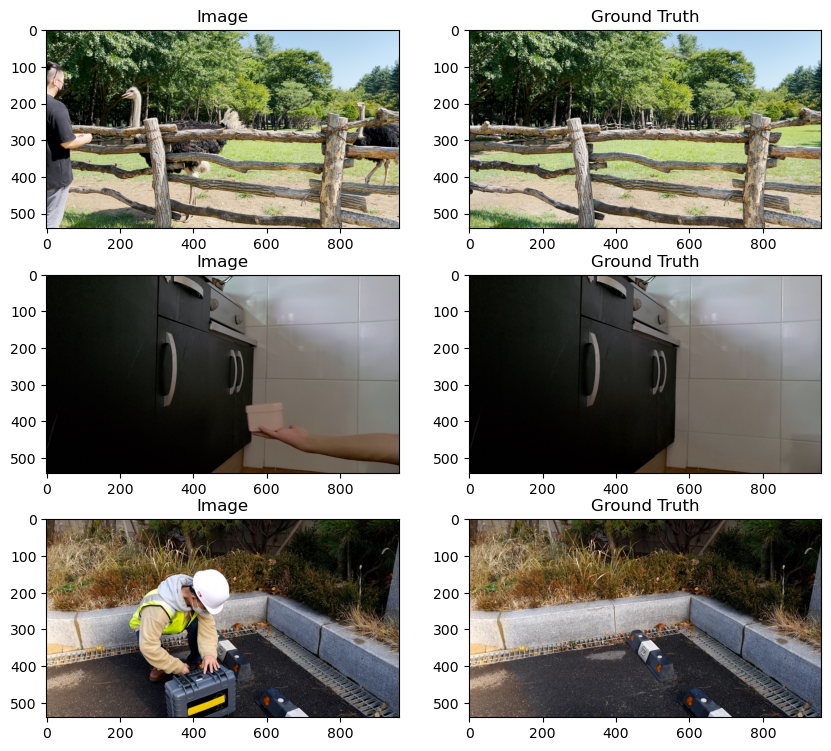

In [27]:
def plot_images(img_files: list, n_images: int = 3):
    fig, axs = plt.subplots(n_images, 2, figsize=(10, n_images * 3))
    for i in range(n_images):
        img_file = random.choice(img_files)
        # replace img with gt to get the corresponding gt file
        gt_file = img_file.replace("img", "gt")
        img = io.imread(img_file)
        gt = io.imread(gt_file)
        axs[i, 0].imshow(img)
        axs[i, 0].set_title("Image")
        axs[i, 1].imshow(gt)
        axs[i, 1].set_title("Ground Truth")
    plt.show()


plot_images(img_files=jpg_files, n_images=3)

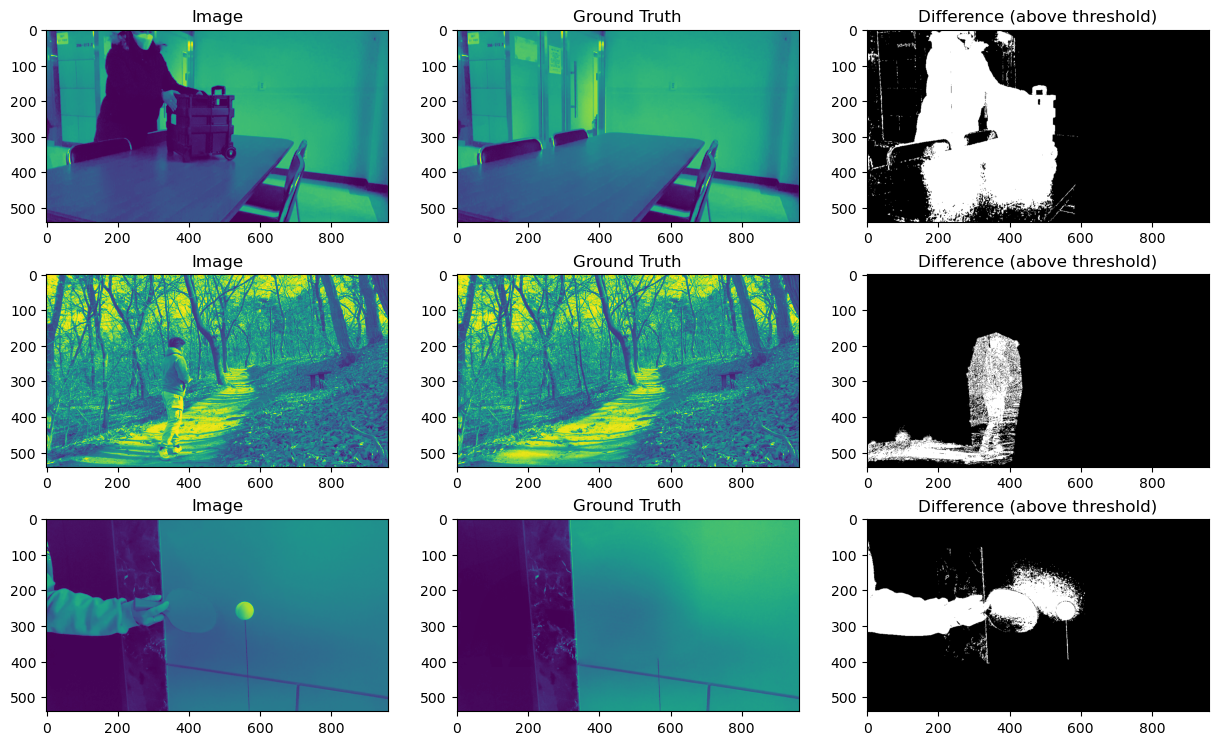

In [40]:
def plot_diff_images(img_files: list, n_images: int = 3, threshold: int = 0.05):
    fig, axs = plt.subplots(n_images, 3, figsize=(15, n_images * 3))
    for i in range(n_images):
        img_file = random.choice(img_files)
        # replace img with gt to get the corresponding gt file
        gt_file = img_file.replace("img", "gt")
        img = io.imread(img_file, as_gray=True)
        gt = io.imread(gt_file, as_gray=True)
        diff = np.abs(img - gt)
        mask = diff > threshold
        result = np.zeros_like(img)
        result[mask] = 255
        axs[i, 0].imshow(img)
        axs[i, 0].set_title("Image")
        axs[i, 1].imshow(gt)
        axs[i, 1].set_title("Ground Truth")
        axs[i, 2].imshow(result, cmap='gray')
        axs[i, 2].set_title("Difference (above threshold)")
    plt.show()


plot_diff_images(img_files=jpg_files, n_images=3)

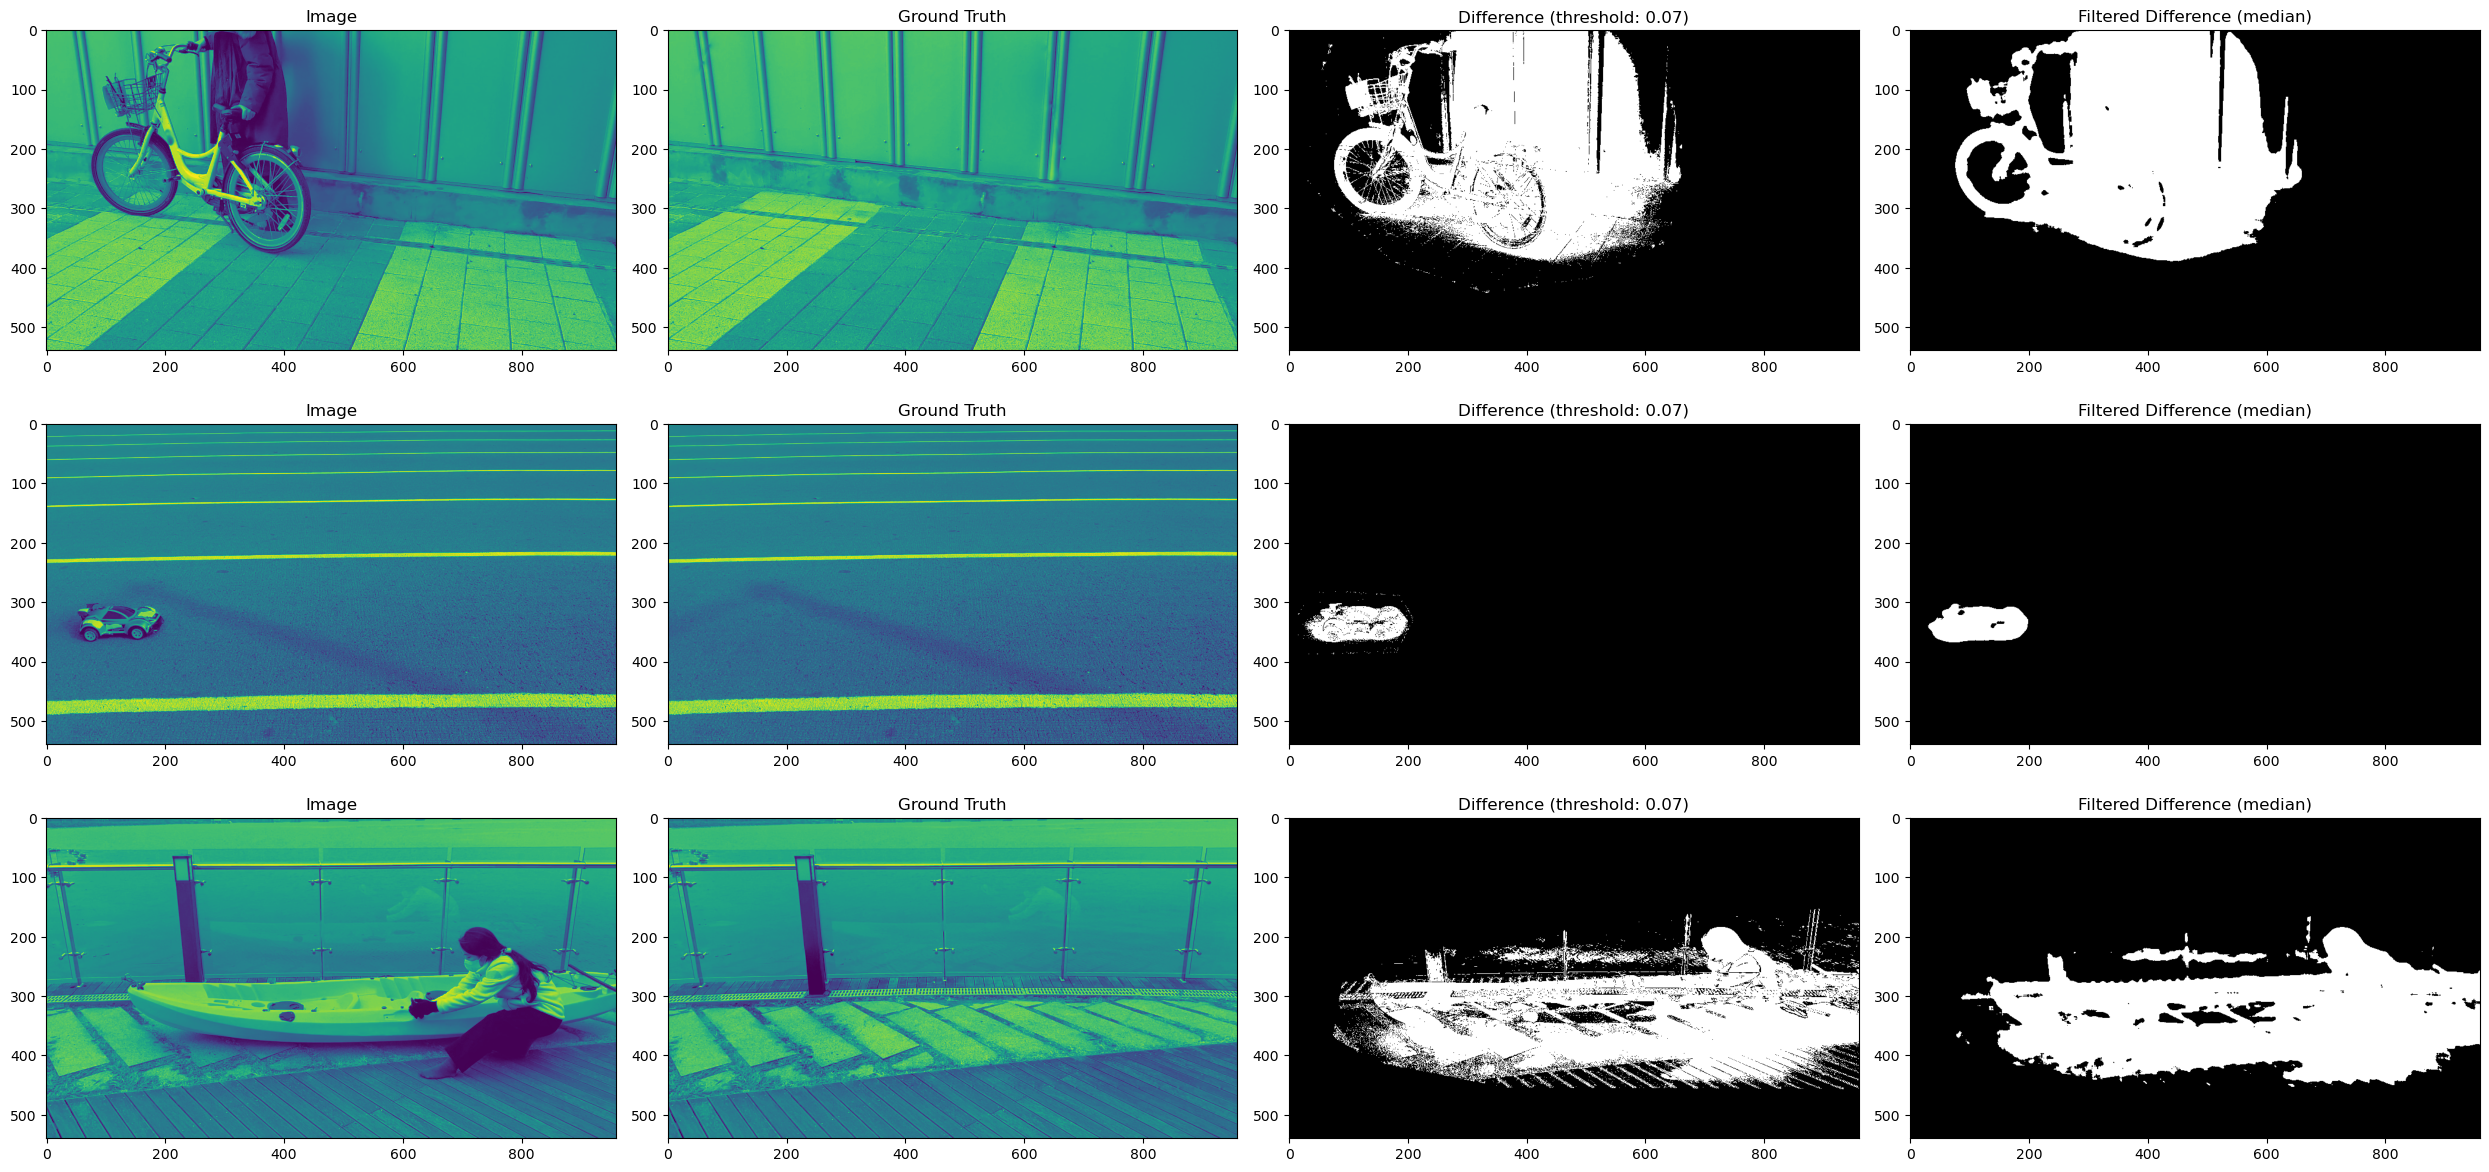

In [75]:
def plot_diff_images(img_files: list, n_images: int = 3, threshold: int = 0.07, filter_type: str = 'median'):
    fig, axs = plt.subplots(n_images, 4, figsize=(25, n_images * 4))
    for i in range(n_images):
        img_file = random.choice(img_files)
        # replace img with gt to get the corresponding gt file
        gt_file = img_file.replace("img", "gt")
        img = io.imread(img_file, as_gray=True)
        gt = io.imread(gt_file, as_gray=True)
        diff = np.abs(img - gt)
        mask = diff > threshold
        result = np.zeros_like(img)
        result[mask] = 255

        # Apply filter
        if filter_type == 'median':
            filtered_result = ndimage.median_filter(result, size=8)
        elif filter_type == 'gaussian':
            filtered_result = ndimage.gaussian_filter(result, sigma=1)
            filtered_result = filtered_result > 0.5
        elif filter_type == 'mean':
            filtered_result = ndimage.uniform_filter(result, size=5)
            # threshold the filtered result
            filtered_result = filtered_result > 0.5
        else:
            raise ValueError("Invalid filter type. Choose from 'median', 'gaussian', or 'mean'.")

        axs[i, 0].imshow(img)
        axs[i, 0].set_title("Image")
        axs[i, 1].imshow(gt)
        axs[i, 1].set_title("Ground Truth")
        axs[i, 2].imshow(result, cmap='gray')
        axs[i, 2].set_title(f"Difference (threshold: {threshold})")
        axs[i, 3].imshow(filtered_result, cmap='gray')
        axs[i, 3].set_title(f"Filtered Difference ({filter_type})")
        plt.tight_layout()
    plt.show();


plot_diff_images(img_files=jpg_files, n_images=3, filter_type='median')

In [ ]:
def create_binary_masks_folder(img_files: list, threshold: int = 0.05, filter_size: int = 3):
    parent_dir = os.path.dirname(img_files[0])
    masks_folder = os.path.join(parent_dir, 'mask')
    if not os.path.exists(masks_folder):
        os.makedirs(masks_folder)

    total_files = len(img_files)
    for i, img_file in enumerate(img_files):
        try:
            img_subdir = os.path.dirname(img_file).replace('img', 'mask')
            mask_subdir = os.path.join(masks_folder, img_subdir)
            if not os.path.exists(mask_subdir):
                os.makedirs(mask_subdir)

            gt_file = img_file.replace("img", "gt")
            img = io.imread(img_file, as_gray=True)
            gt = io.imread(gt_file, as_gray=True)
            diff = np.abs(img - gt)
            mask = diff > threshold

            filtered_mask = ndimage.median_filter(mask.astype(float), size=filter_size)
            binary_mask = (filtered_mask > 0).astype(np.uint8) * 255
            mask_file = os.path.join(mask_subdir, img_file.replace("img", "mask").replace(".jpg", ".png"))
            io.imsave(mask_file, binary_mask)

            print(f"Mask {i + 1} of {total_files} processed", end='\r')
        except UserWarning as e:
            print(f"Warning: {e}")
            print(f"Image stats: min={binary_mask.min()}, max={binary_mask.max()}, mean={binary_mask.mean()}")

    print(f"Binary masks folder created: {masks_folder}")


create_binary_masks_folder(img_files=jpg_files, threshold=0.05, filter_size=8)